<a href="https://colab.research.google.com/github/nitinranjansharma/EIP4-Week1/blob/master/Week3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 13s 0us/step


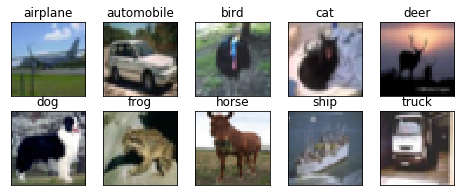

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Model Building - BASE(Rohan) acc- 82.98 best


In [0]:
# Define the model
# Rohan's model Base
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 12s 30ms/step - loss: 1.8788 - acc: 0.2764 - val_loss: 1.4713 - val_acc: 0.4501
Epoch 2/50
390/390 [==============================] - 9s 24ms/step - loss: 1.3682 - acc: 0.4993 - val_loss: 1.1574 - val_acc: 0.5787
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1574 - acc: 0.5876 - val_loss: 1.0039 - val_acc: 0.6422
Epoch 4/50
390/390 [==============================] - 9s 24ms/step - loss: 1.0220 - acc: 0.6404 - val_loss: 0.8745 - val_acc: 0.6967
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9144 - acc: 0.6853 - val_loss: 0.7959 - val_acc: 0.7183
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8426 - acc: 0.7110 - val_loss: 0.7518 - val_acc: 0.7424
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7808 - acc: 0.7314 - val_loss: 0.7002 - val_acc: 0.7609
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

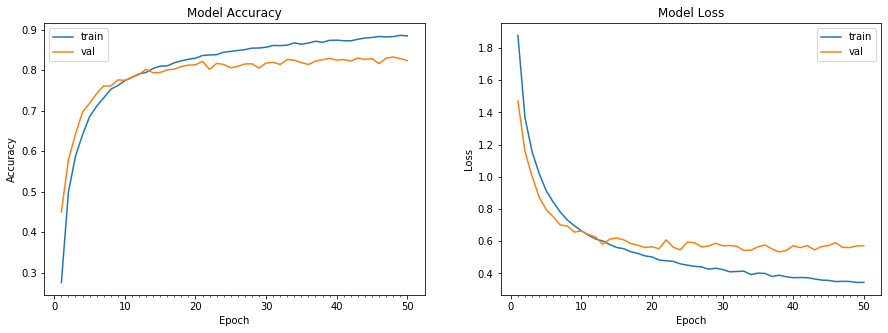

Accuracy on test data is: 82.37


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Our best Model - acc = 82.98

In [0]:
##Defineing New Model
# Final Model
weight_decay = 1e-4 ## https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
model1 = Sequential()
model1.add(SeparableConv2D(filters= 32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,input_shape=(32,32,3),activation='relu'))  #30
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
# 30*30*32
#receptive field =3
model1.add(SeparableConv2D(filters= 64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #28
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
# 28*28*64
#receptive field =5
model1.add(SeparableConv2D(filters= 128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #26
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
# 26*26*128
#receptive field =7
model1.add(MaxPooling2D(pool_size=(2, 2))) #13
# 13*13*32
#receptive field =8

model1.add(SeparableConv2D(filters= 128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #11
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# 11*11*128
#receptive field =12

model1.add(SeparableConv2D(filters= 256,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #9
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# 9*9*256
#receptive field =16

model1.add(MaxPooling2D(pool_size=(2, 2))) 

# 4*4*256
#receptive field =18

model1.add(SeparableConv2D(filters= 64,kernel_size=(1,1),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) 
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# 4*4*64
#receptive field =18

model1.add(SeparableConv2D(filters= 10,kernel_size=(1,1),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) 
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# 4*4*10
#receptive field =18
model1.add(SeparableConv2D(filters= 10,kernel_size=(4,4),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) 

# 1*1*10
#receptive field =30
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.005 * 1/(1 + 0.319 * epoch), 20)
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])

In [0]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_127 (Separa (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_112 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_109 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_128 (Separa (None, 28, 28, 64)        2400      
_________________________________________________________________
dropout_110 (Dropout)        (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 28, 28, 64)        256       
_________________________________________________________________
separable_conv2d_129 (Separa (None, 26, 26, 128)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
390/390 [==============================] - 33s 84ms/step - loss: 0.7065 - acc: 0.7533 - val_loss: 0.9066 - val_acc: 0.7050
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907505686125857.
390/390 [==============================] - 29s 75ms/step - loss: 0.6453 - acc: 0.7757 - val_loss: 0.7563 - val_acc: 0.7371
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.003052503052503053.
390/390 [==============================] - 29s 74ms/step - loss: 0.6066 - acc: 0.7898 - val_loss: 0.6988 - val_acc: 0.7633
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0025549310168625446.
390/390 [==============================] - 29s 74ms/step - loss: 0.5793 - acc: 0.7995 - val_loss: 0.6819 - val_acc: 0.7674
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0021968365553602814.
390/390 [==============================] - 29s 74m

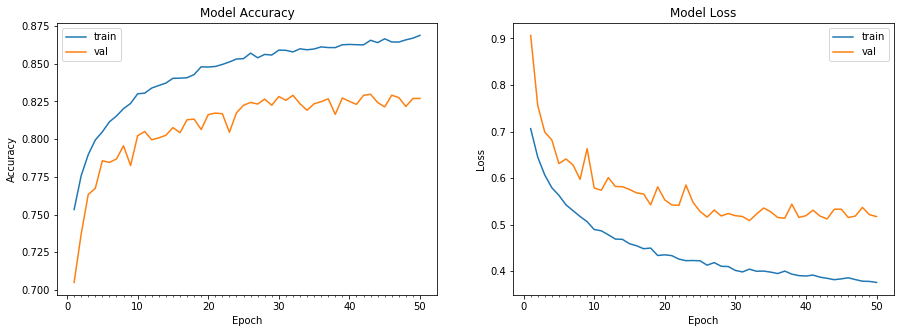

Accuracy on test data is: 82.70


In [0]:
# Final Model
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.0,
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model1_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model1_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))